# Ordinal Encoding 


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
df['Profession'].values

array(['Healthcare', 'Engineer', 'Engineer', ..., 'Healthcare',
       'Executive', 'Entertainment'], dtype=object)

In [4]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
df=df.fillna(method='ffill')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [9]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [10]:
Profession_oder=['Healthcare','Engineer','Lawyer','Entertainment','Artist','Executive','Doctor','Homemaker','Marketing']

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enco=OrdinalEncoder(categories=[Profession_oder])

In [16]:
enco.fit(df[["Profession"]])

OrdinalEncoder(categories=[['Healthcare', 'Engineer', 'Lawyer', 'Entertainment',
                            'Artist', 'Executive', 'Doctor', 'Homemaker',
                            'Marketing']])

In [27]:
Final=pd.DataFrame(enco.transform(df[['Profession']]),columns=['Profession'])
Final

,Profession
0,0.0
1,1.0
2,1.0
3,2.0
4,3.0
...,...
1995,4.0
1996,6.0
1997,0.0
1998,5.0


In [28]:
x=df.drop(['Profession'],axis=1)
x

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,Male,19,15000,39,1,4
1,2,Male,21,35000,81,3,3
2,3,Female,20,86000,6,1,1
3,4,Female,23,59000,77,0,2
4,5,Female,31,38000,40,2,6
...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,8,7
1996,1997,Female,91,73158,32,7,7
1997,1998,Male,87,90961,14,9,2
1998,1999,Male,77,182109,4,7,2


In [29]:
Add=pd.concat([x,Final],axis=1)
Add

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession
0,1,Male,19,15000,39,1,4,0.0
1,2,Male,21,35000,81,3,3,1.0
2,3,Female,20,86000,6,1,1,1.0
3,4,Female,23,59000,77,0,2,2.0
4,5,Female,31,38000,40,2,6,3.0
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,8,7,4.0
1996,1997,Female,91,73158,32,7,7,6.0
1997,1998,Male,87,90961,14,9,2,0.0
1998,1999,Male,77,182109,4,7,2,5.0


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [37]:
Add['Gender']=le.fit_transform(Add['Gender'])
Add

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession
0,1,1,19,15000,39,1,4,0.0
1,2,1,21,35000,81,3,3,1.0
2,3,0,20,86000,6,1,1,1.0
3,4,0,23,59000,77,0,2,2.0
4,5,0,31,38000,40,2,6,3.0
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,8,7,4.0
1996,1997,0,91,73158,32,7,7,6.0
1997,1998,1,87,90961,14,9,2,0.0
1998,1999,1,77,182109,4,7,2,5.0


In [39]:
Add['Family Size']=le.fit_transform(Add['Family Size'])
Add

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession
0,1,1,19,15000,39,1,3,0.0
1,2,1,21,35000,81,3,2,1.0
2,3,0,20,86000,6,1,0,1.0
3,4,0,23,59000,77,0,1,2.0
4,5,0,31,38000,40,2,5,3.0
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,8,6,4.0
1996,1997,0,91,73158,32,7,6,6.0
1997,1998,1,87,90961,14,9,1,0.0
1998,1999,1,77,182109,4,7,1,5.0


In [40]:
import matplotlib.pyplot as plt

<BarContainer object of 2000 artists>

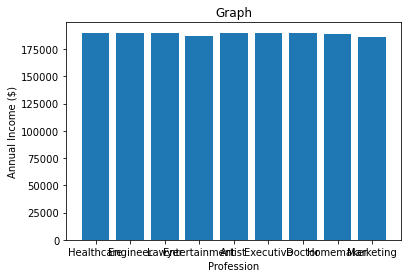

In [47]:
%matplotlib inline
plt.title('Graph')
plt.xlabel('Profession')
plt.ylabel('Annual Income ($)')
plt.bar(df['Profession'],df['Annual Income ($)'])